In [5]:
%%time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
x_new = df
df = df.drop(df.index[:7])
df = df.drop(df.index[-12:])
# normalizovat dataframe 
df=(df-df.min())/(df.max()-df.min())
repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7']
aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7']
nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7']
cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7']
doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']
models = []

for i in range(1,7):
    datum = df['datum']
    x = df[["index", "repo-1", aktivni[i-1],nove[i-1],doba[i-1]]]
    y = df[['aktivni']]
    #fit OLS reresi 
    model = sm.OLS(y,x).fit()
    models.append(model)
    #print(len(models))
    print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              684.0
Date:                Thu, 02 Mar 2023   Prob (F-statistic):                    4.71e-67
Time:                        09:59:11   Log-Likelihood:                          93.516
No. Observations:                  90   AIC:                                     -177.0
Df Residuals:                      85   BIC:                                     -164.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

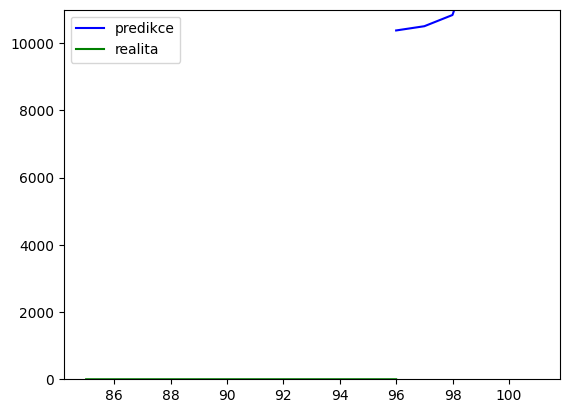

0      96    10381.75709
dtype: float64
1      97    10507.65017
dtype: float64
2     98    10841.840877
dtype: float64
3     99    13317.171802
dtype: float64
4    100    12712.360167
dtype: float64
5    101    12273.442337
dtype: float64
Name: predikce, dtype: object

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
#normalizovat dataframe
normalized_df=(df-df.min())/(df.max()-df.min())
# realna data pro graf

# data oro predikce
repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7']
aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7']
nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7']
cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7']
doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']

predictions_list =[]
predikce = {}

i=0
for i in range(1,7):
    x_new = df.drop(df.index[:-14+i])
    x_new = x_new.drop(x_new.index[-13+i:])
    datum = x_new['datum']
    model = models[i-1]
    x_new = x_new[["index", "repo-1", aktivni[i-1],nove[i-1], doba[i-1]]]
    #predikce
    y_pred = model.predict(x_new)
    #print(f"\n{i}")
    #print(model.summary())
    #print(y_pred)
    #dict s predikcemi
    prediction_dict = {"index" : x_new["index"],
                        'predikce' :y_pred}
    predictions_list.append(prediction_dict)
# graf
rozsah = 12

predictions_df = pd.DataFrame(predictions_list)
plt.plot(predictions_df['index'],predictions_df["predikce"], color='blue', label='predikce')
plt.plot(x.index[-rozsah:], y[-rozsah:], color='green', label='realita')
plt.ylim(0, 11000)
plt.legend()
plt.show()
# tabulka
display(predictions_df['predikce'])